In [379]:
import scipy.stats as stats
import pandas as pd

# Задание 1

In [401]:
df_file = pd.read_excel('Downloads/ls_variants.xls', sheet_name='вар. 3')

In [381]:
data = [[100,200,300,400,500,600],[1,2,3,4,5,6], [1, 1, 1, 1, 1, 1], [10, 20, 30, 40, 50, 60],[123,653,765,8542,1123,1], [11,11111,312,-432,0,0]]

df = pd.DataFrame(data).T
df.columns = ["Y", "X1", "X2", "X3", "X4", 'X5']


In [382]:
df

,Y,X1,X2,X3,X4,X5
0,100,1,1,10,123,11
1,200,2,1,20,653,11111
2,300,3,1,30,765,312
3,400,4,1,40,8542,-432
4,500,5,1,50,1123,0
5,600,6,1,60,1,0


In [383]:
import numpy as np
from scipy.stats import f

def fisher_test(df):
    """
    Функция, которая проверяет гипотезу о значимости группы факторов на отклик по критерию Фишера
    
    :param df: датафрейм с откликом в первом столбце, а остальные столбцы - признаки
    
    :return: p-value и результат теста
    """
    
    # Количество признаков
    k = df.shape[1] - 1
    
    # Размер выборки
    n = df.shape[0]
    
    # Среднее значение для каждого признака
    means = [np.mean(df.iloc[:, i+1]) for i in range(k)]
    
    # Среднее значение по всем признакам
    mean_all = np.mean(means)
    
    # Сумма квадратов отклонений внутри группы
    ssw = sum([np.sum((df.iloc[:, i+1] - means[i])**2) for i in range(k)])
    
    # Сумма квадратов отклонений между группами
    ssb = sum([n * (means[i] - mean_all)**2 for i in range(k)])
    
    # Среднеквадратическое отклонение внутри группы
    mse = ssw / (n - k - 1)
    
    # Среднеквадратическое отклонение между группами
    msb = ssb / (k)
    
    # Статистика критерия Фишера
    f_stat = msb / mse
    
    # Вычисление p-value
    p_value = 1 - f.cdf(f_stat, k, n - k - 1)
    
    # Вывод результата теста
    if p_value < 0.05:
        result = "Группа факторов значима"
    else:
        result = "Группа факторов не значима"
        
    return p_value, result

In [384]:
from scipy.stats import ttest_ind
import pandas as pd

# реализует проверку каждого фактора по отдельности, чтобы выбрать группу не значимых факторов 
# и перейти к совокупной их проверке по фишеру
def t_test(df):
    col_names = df.columns.values.tolist()
    result = []
    for col in col_names[1:]:
        sample1 = df[col_names[0]]
        sample2 = df[col]
        t_stat, p_value = ttest_ind(sample1, sample2)
        print(f'{col}: ', 'statistic=',t_stat, 'pvalue=',p_value)
        if p_value > 0.1:
            result.append(col)
    if len(result)>0:
        print('незначимые факторы:')
        print(result)
    if len(result) == 0:
        print('нет незначимых факторов')
    return result # выводи названия столбцов, которые содержат незначимые факторы

In [385]:
df

,Y,X1,X2,X3,X4,X5
0,100,1,1,10,123,11
1,200,2,1,20,653,11111
2,300,3,1,30,765,312
3,400,4,1,40,8542,-432
4,500,5,1,50,1123,0
5,600,6,1,60,1,0


In [386]:
res = t_test(df) # применяем тест стьюдента для каждого признака
# получили имена не значимых признаков

X1:  statistic= 4.536523117520776 pvalue= 0.0010804758100858819
X2:  statistic= 4.56948262154168 pvalue= 0.0010270741624738174
X3:  statistic= 4.103849919090103 pvalue= 0.002131410516842656
X4:  statistic= -1.1261675333203314 pvalue= 0.2863946906100941
X5:  statistic= -0.7978570400437252 pvalue= 0.44348706275554983
незначимые факторы:
['X4', 'X5']


In [387]:
_=t_test(df_file) # пробую специально запустить на значимых факторах

y:  statistic= 72.19750867981027 pvalue= 0.0
нет незначимых факторов


In [388]:
# оставляем только отклик и незначимые факторы
target = df.columns.values.tolist()[0]
res.reverse()
res.append(target)
res.reverse()
df1 = df[res]
df1

,Y,X4,X5
0,100,123,11
1,200,653,11111
2,300,765,312
3,400,8542,-432
4,500,1123,0
5,600,1,0


In [389]:
fisher_test(df1)

(0.9999667291334603, 'Группа факторов не значима')

# Задание 2

In [406]:
import numpy as np
import math
import matplotlib.pyplot as plt

def model(x, y):# define the design matrix X and response variable y
    X = np.array(x)
    y = np.array(y)

    # calculate the least squares estimates for beta
    XtX = X.T @ X
    Xty = X.T @ y
    beta_hat = np.linalg.solve(XtX, Xty)

    return beta_hat


In [407]:
def create_dataframe(x,y):
    # create list of column names
    col_names = ['X' + str(i+1) for i in range(len(x[0]))]

    # create dataframe
    df = pd.DataFrame(x, columns=col_names)
    df.insert(0, 'Y', y)

    return df

In [408]:
def multiply_lists(matrix, vector):
    result = []
    for row in matrix:
        row_result = 0
        for i in range(len(row)):
            row_result += row[i] * vector[i]
        result.append(row_result)
    return result

In [409]:
df_file

,x,y
0,0.048526,-9.258041
1,0.049030,-9.603755
2,0.049535,-9.379106
3,0.050039,-9.501397
4,0.050543,-9.307051
...,...,...
1059,0.582485,-2.511710
1060,0.582989,-2.650733
1061,0.583494,-2.708039
1062,0.583998,-2.766612


In [410]:
# первая модель

In [473]:
df

,Y,X1,X2,X3,X4,X5
0,100,1,1,10,123,11
1,200,2,1,20,653,11111
2,300,3,1,30,765,312
3,400,4,1,40,8542,-432
4,500,5,1,50,1123,0
5,600,6,1,60,1,0


In [1013]:
data = [[100,200,300,400,500,600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500 ],[1.1,2.1,2.9,3.8,5.2,6, 7, 8.1, 9.3, 9.9, 11.2, 12.1, 12.9, 14, 15], [1, 2, 1, 4, 8, 6, 7, 8, 0, 10], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],[123,653,765,8542,1123,1, 12, 321, 666, 555, 1, 1, 1, 1, 1], [11,11111,312,-432,0,0, 0, 12, 321, 5,1,1,1,1,1]]
df = pd.DataFrame(data).T
df.columns = ["Y", "X1", "X2", "X3", "X4", 'X5']

In [1012]:
# мой выдуманный пример
original_list = df[['Y','X2']].X2.tolist() # replace "..." with the rest of the sequence
x = [[x, (x-1)**44, math.cos(x), 1] for x in original_list]
y = df[['Y','X5']].Y.tolist()
# print(new_list)

In [555]:
# пример из файла
original_list = df_file.x.tolist() # replace "..." with the rest of the sequence
x = [[x, x**2, x**3, x**6, x**8, math.cos(177/x), math.sin(math.tan(math.exp(112*x))), math.log(1/(1+x)), 1] for x in original_list]
y = df_file.y.tolist()
# print(new_list)

In [946]:
y_x_factors = create_dataframe(x, y)
y_x_factors

,Y,X1,X2,X3,X4
0,100.0,1.0,0.000000e+00,0.540302,1
1,200.0,2.0,1.000000e+00,-0.416147,1
2,300.0,1.0,0.000000e+00,0.540302,1
3,400.0,4.0,9.847709e+20,-0.653644,1
4,500.0,8.0,1.528670e+37,-0.145500,1
5,600.0,6.0,5.684342e+30,0.960170,1
6,700.0,7.0,1.732427e+34,0.753902,1
7,800.0,8.0,1.528670e+37,-0.145500,1
8,900.0,0.0,1.000000e+00,1.000000,1
9,1000.0,10.0,9.697737e+41,-0.839072,1


In [947]:
coeffs = model(x,y)
print(coeffs)

[4.28207508e+01 4.89707373e-40 2.04657261e+02 2.68611390e+02]


In [948]:
# multiply_lists(x, coeffs)

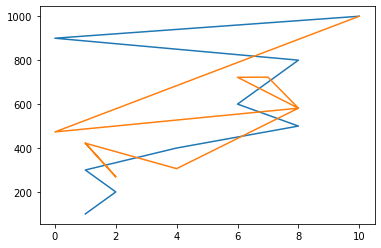

In [949]:
plt.plot(original_list, y)
plt.plot(original_list, multiply_lists(x, coeffs))

In [950]:
t_test(y_x_factors)

X1:  statistic= 5.695078937836861 pvalue= 2.1169248812883996e-05
X2:  statistic= -1.000035049013249 pvalue= 0.3305484303239691
X3:  statistic= 5.742882414463693 pvalue= 1.916232963773824e-05
X4:  statistic= 5.734117987180687 pvalue= 1.9515065058141273e-05
незначимые факторы:
['X2']


['X2']

# Задание 3

In [1044]:
from sklearn.metrics import mean_squared_error, r2_score

def model_quality(y_true, y_pred):
    
    # Расчет дисперсии остатков
    m = mean_squared_error(y_true, y_pred)
    
    # Расчет коэффициента детерминации
    r2 = r2_score(y_true, y_pred)
    
    return m, r2


In [1014]:
# мой выдуманный пример
original_list = df[['Y','X1']].X1.tolist() # replace "..." with the rest of the sequence
x = [[x, (x-1)/(x+4)**4, math.cos(x), math.exp(12*x),x**44, 1] for x in original_list]
y = df[['Y','X5']].Y.tolist()
# print(new_list)

In [1015]:
y_x_factors = create_dataframe(x, y)
# y_x_factors

In [1016]:
coeffs = model(x,y)
print(coeffs)

[ 1.00623851e+02  2.58927343e+04  9.17641227e-01 -1.08594296e-76
  3.03829318e-50 -1.97803995e+01]


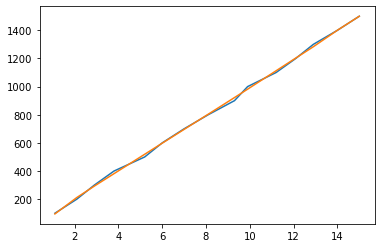

In [1017]:
plt.plot(original_list, y)
plt.plot(original_list, multiply_lists(x, coeffs))

In [1018]:
# до удаления
model_quality(y,multiply_lists(x, coeffs)) #mse, r2

(147.61810839417248, 0.9992091887050312)

In [1019]:
black_list = t_test(y_x_factors)

X1:  statistic= 6.858231571301561 pvalue= 1.879935195770899e-07
X2:  statistic= 6.928199996332392 pvalue= 1.5667612071890649e-07
X3:  statistic= 6.928388278118754 pvalue= 1.5659942668804234e-07
X4:  statistic= -1.0000065830809572 pvalue= 0.3258715771082673
X5:  statistic= -1.051942378973329 pvalue= 0.30182020783259333
X6:  statistic= 6.919542976237665 pvalue= 1.6024399430779978e-07
незначимые факторы:
['X4', 'X5']


In [1020]:
# оставляем только отклик и незначимые факторы
target = y_x_factors.columns.values.tolist()[0]
black_list.reverse()
black_list.append(target)
black_list.reverse()
df1 = y_x_factors[black_list]
df1

,Y,X4,X5
0,100.0,5.403649e+05,6.626408e+01
1,200.0,8.794698e+10,1.505390e+14
2,300.0,1.298518e+15,2.215705e+20
3,400.0,6.365439e+19,3.239502e+25
4,500.0,1.258855e+27,3.192619e+31
5,600.0,1.858672e+31,1.732427e+34
6,700.0,3.025077e+36,1.528670e+37
7,800.0,1.634646e+42,9.404611e+39
8,900.0,2.932677e+48,4.104401e+42
9,1000.0,3.928117e+51,6.426116e+43


In [1021]:
fisher_test(df1)

(0.8101380263677219, 'Группа факторов не значима')

In [1022]:
# удаляем незначимые факторы

In [1023]:
df1 = y_x_factors.drop(black_list, axis=1)

In [1024]:
df1

,X1,X2,X3,X6
0,1.1,0.000148,0.453596,1
1,2.1,0.000794,-0.504846,1
2,2.9,0.000838,-0.970958,1
3,3.8,0.000756,-0.790968,1
4,5.2,0.000586,0.468517,1
5,6.0,0.000500,0.960170,1
6,7.0,0.000410,0.753902,1
7,8.1,0.000331,-0.243544,1
8,9.3,0.000265,-0.992225,1
9,9.9,0.000238,-0.889191,1


In [1025]:
fisher_test(df1)

(0.02319485712583902, 'Группа факторов значима')

In [1026]:
# мой выдуманный пример - удаляем ненужные
original_list = df[['Y','X1']].X1.tolist() # replace "..." with the rest of the sequence
x = [[x, (x-1)/(x+4)**4, math.cos(x), 1] for x in original_list]
y = df[['Y','X5']].Y.tolist()
# print(new_list)

In [1027]:
y_x_factors = create_dataframe(x, y)
# y_x_factors

In [1028]:
coeffs = model(x,y)
print(coeffs)

[ 1.01005769e+02  2.54046252e+04  9.37698328e-03 -2.15728533e+01]


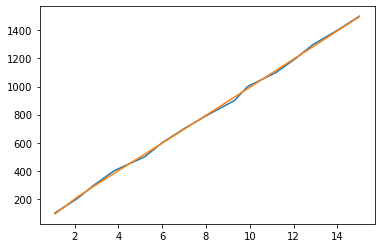

In [1029]:
plt.plot(original_list, y)
plt.plot(original_list, multiply_lists(x, coeffs))

In [1030]:
# после удаления
model_quality(y,multiply_lists(x, coeffs)) #mse, r2

(152.29368602475398, 0.9991841409677246)

# Задание 4

In [1083]:
def conf_interval(X, y, model, alpha=0.05):
    """
    Функция, которая вычисляет доверительные интервалы коэффициентов модели линейной регрессии
    
    :param X: матрица признаков
    :param y: вектор целевой переменной
    :param model: обученная модель линейной регрессии
    :param alpha: уровень значимости
    
    :return: доверительные интервалы коэффициентов модели
    """
    # Число наблюдений и число признаков
    n, m = X.shape
    
    # Размерность матрицы X
    k = n - m
    
    # Среднее значение по каждому признаку
    X_mean = np.mean(X, axis=0)
    
    # Матрица сумм квадратов отклонений по каждому признаку
    S_xx = np.sum((X - X_mean)**2, axis=0)
    
    # Остаточная сумма квадратов
    SSE = np.sum((y - multiply_lists(x, coeffs))**2)
    
    # Средняя остаточная сумма квадратов
    MSE = SSE / k
    
    # Стандартные ошибки оценок коэффициентов
    SE = np.sqrt(MSE * np.linalg.inv(np.dot(X.T, X)).diagonal())
    
    # Критическое значение t-статистики
    t = stats.t.ppf(1 - alpha / 2, k)
    
    # Доверительные интервалы коэффициентов
    CI = np.vstack((coeffs - t * SE, coeffs + t * SE)).T
    
    return CI


In [1084]:
# пример из файла
original_list = df_file.x.tolist() # replace "..." with the rest of the sequence
x = [[x, x**2, x**3, x**6, x**8, math.cos(177/x), math.sin(math.tan(math.exp(112*x))), math.log(1/(1+x)), 1] for x in original_list]
y = df_file.y.tolist()
# print(new_list)

In [1085]:
y_x_factors = create_dataframe(x, y)
# y_x_factors

In [1086]:
coeffs = model(x,y)
print(coeffs)

[ 1.02420857e+06 -4.91213829e+05  2.28471485e+05 -1.66684715e+05
  1.70611715e+05  3.08672864e-02 -3.66061401e-03  1.02584605e+06
  3.26788154e+01]


In [1087]:
conf_interval(np.array(x),np.array(y),coeffs)

array([[ 1.00727792e+06,  1.04113923e+06],
       [-4.99267712e+05, -4.83159946e+05],
       [ 2.24806666e+05,  2.32136304e+05],
       [-1.69272737e+05, -1.64096694e+05],
       [ 1.67846463e+05,  1.73376966e+05],
       [-3.18347612e-02,  9.35693341e-02],
       [-6.96507994e-02,  6.23295714e-02],
       [ 1.00887343e+06,  1.04281866e+06],
       [ 3.11186950e+01,  3.42389359e+01]])

In [1088]:
coeffs

array([ 1.02420857e+06, -4.91213829e+05,  2.28471485e+05, -1.66684715e+05,
        1.70611715e+05,  3.08672864e-02, -3.66061401e-03,  1.02584605e+06,
        3.26788154e+01])